In [102]:
import pandas as pd #csv, dataframes
import numpy as np

import re 
from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from plotly.offline import init_notebook_mode, iplot, plot
from datetime import date, datetime, timedelta
import plotly as py
import plotly.graph_objs as go
import collections
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
#
import os
import tensorflow.keras as keras; 
import tensorflow as tf; 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

import numpy as np
import pandas as pd

import os
import librosa
import librosa.display

from sklearn.preprocessing import LabelEncoder
#from keras.utils import to_categorical

import struct

import cv2

import matplotlib.pyplot as plt

import cv2
import matplotlib.pyplot as plt
print("Versão Keras :" , keras.__version__)
print("Versão Tensorflow :" , tf.__version__)



Versão Keras : 2.3.0-tf
Versão Tensorflow : 2.2.0


## Instalação de pacotes necessários ao Notebook

In [103]:
#!pip install pandas
#!pip install xlrd
#!pip install librosa
#!pip install sndfile
#!apt-get install libsndfile1
#!pip install wavefile

## Representação de Dados
* tabular
* Imagem
* Séries
* Áudio
* Texto

## Representação de imagens

* Imagens são compostas por uma matriz de pixel

* Cada pixel pode ser definido como um ou mais valores
    * Imagens em tom de cinza possuem apenas um valor de pixel
    * Imagens codificadas como RGB (possuem 3 canais)
    
* A representação pode ser feita por uma matriz de 4 dimensões
    * Altura
    * Largura
    * Canal de cor
    * Amostras

* Há dois padrões para representar imagens como vetores:

    * channel first: dimensão de canais de cor aparece primeiro
        (amostras, canais de cor, altura, lagura)
    * channel last: dimensão de canais de cor aparece por último (padrão tensorflow - Keras)
        (amostras, altura, lagura, canais de cor)
        

## Exemplo asas de abelhas

* Utilizaremos esses dados como exercício para algumas aulas

* Segue papers de referência do desafio:

https://www.sciencedirect.com/science/article/abs/pii/S1574954113001222
https://www.sciencedirect.com/science/article/pii/S0168169915000873

* Dados:
* https://f-leno.github.io/downloads/WingImagesAReference.zip
* https://f-leno.github.io/downloads/WingImagesEvaluatingClassification.zip

In [12]:
!ls /home/silvio/dataset/bees/wingsEval

'adansonii 10  7.jpg'	 'cecropia 8  6.jpg'	  'meda 5  9.jpg'
'adansonii 10  8.jpg'	 'cecropia 8  7.jpg'	  'meda 6  10.jpg'
'adansonii 10  9.jpg'	 'cecropia 8  8.jpg'	  'meda 6  1.jpg'
'adansonii 11  10.jpg'	 'cecropia 8  9.jpg'	  'meda 6  2.jpg'
'adansonii 11  1.jpg'	 'cecropia 9  10.jpg'	  'meda 6  3.jpg'
'adansonii 11  2.jpg'	 'cecropia 9  1.jpg'	  'meda 6  4.jpg'
'adansonii 11  3.jpg'	 'cecropia 9  2.jpg'	  'meda 6  5.jpg'
'adansonii 11  4.jpg'	 'cecropia 9  3.jpg'	  'meda 6  6.jpg'
'adansonii 11  5.jpg'	 'cecropia 9  4.jpg'	  'meda 6  7.jpg'
'adansonii 11  6.jpg'	 'cecropia 9  5.jpg'	  'meda 6  8.jpg'
'adansonii 11  7.jpg'	 'cecropia 9  6.jpg'	  'meda 6  9.jpg'
'adansonii 11  8.jpg'	 'cecropia 9  7.jpg'	  'meda 7  10.jpg'
'adansonii 11  9.jpg'	 'cecropia 9  8.jpg'	  'meda 7  1.jpg'
'adansonii 12  10.jpg'	 'cecropia 9  9.jpg'	  'meda 7  2.jpg'
'adansonii 12  1.jpg'	 'cypria 1  10.jpg'	  'meda 7  3.jpg'
'adansonii 12  2.jpg'	 'cypria 1  1.jpg'	  'meda 7  4.jpg'
'adansonii 12  3.jpg'	

(320, 320)


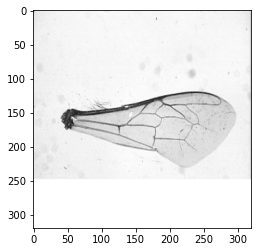

In [54]:


main_dir = "/home/silvio/dataset/bees/"
train_dir = "wingsEval"
path = os.path.join(main_dir,train_dir)

# Percorre todos os arquivos do diretório
for p in os.listdir(path):
    # Categoria é obtida a partir do nome do arquivo
    category = p.split(" ")[0]
    
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(320, 320))
    plt.imshow(new_img_array,cmap="gray")
    break
print(new_img_array.shape)

In [44]:
#!ls /home/silvio/git/datasets/bees/wingsEval

X = []
y = []


# Percorre os arquivos no diretório de imagens para treinamento
def create_test_data(path):
    for p in os.listdir(path):

        # categoria da imagem é definida pelo nome do arquivo
        category = p.split(" ")[0]
        
        # Abre a imagem usando opencv em escala de cinza
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)

        # Redimensionamento para 80 x 80 pixels
        new_img_array = cv2.resize(img_array, dsize=(320, 320))
        
        X.append(new_img_array)
        y.append(category)

In [45]:
#path= "../dogsCatsDB/train"
path="/home/silvio/git/datasets/bees/wingsEval"

create_test_data(path)

print(np.array(X).shape)
print(np.array(y).shape)

X = np.array(X).reshape(-1, 320,320,1)
y = np.array(y)

print(np.array(X).shape)
print(np.array(y).shape)

(1737, 320, 320)
(1737,)
(1737, 320, 320, 1)
(1737,)


In [17]:
X


[[[[233]
   [221]
   [225]
   ...
   [230]
   [228]
   [198]]

  [[231]
   [179]
   [172]
   ...
   [226]
   [228]
   [197]]

  [[226]
   [197]
   [192]
   ...
   [230]
   [228]
   [200]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]


 [[[ 96]
   [ 95]
   [ 97]
   ...
   [226]
   [228]
   [211]]

  [[225]
   [224]
   [226]
   ...
   [226]
   [227]
   [211]]

  [[228]
   [227]
   [229]
   ...
   [225]
   [227]
   [211]]

  ...

  [[227]
   [227]
   [229]
   ...
   [226]
   [223]
   [203]]

  [[224]
   [225]
   [226]
   ...
   [232]
   [228]
   [190]]

  [[ 91]
   [ 92]
   [ 93]
   ...
   [ 94]
   [102]
   [ 87]]]


 [[[ 97]
   [101]
   [ 97]
   ...
   [232]
   [231]
   [215]]

  [[231]
   [234]
   [230]
   ...
   [229]
   [228]
   [212]]

  [[232]
   [233]
   [231]
   ...
   [233]
   [232]
   [216]]

  ...

  [[226]
   [226]
   [231]
   

In [46]:
y

array(['intermissa', 'major', 'ligustica', ..., 'cecropia', 'carnica',
       'caucasica'], dtype='<U11')

## Representação de Sequência e Séries Temporais

* Alguns fenômenos são representados como uma sequência de acontecimentos (Exemplos)
    * Variação de preço de ações
    * Sequência de palavras
    * Crescimento de animais

* Uma estratégia é representar a sequência de ações como uma sequência de colunas,
  e repetir as colunas para um número fixo de sequências

* Outra estratégia é representar cada sequência como uma linha


## Estratégias de Representação

### Preços de ações. 
    * A cada minuto, armazenamos o preço atual das ações, o preço mais alto do último minuto e o preço mais baixo do último minuto. 
    * Cada minuto é codificado como um vetor 3D, um dia inteiro de negociação é codificado como um tensor 2D de forma (390, 3) (há 390 minutos em um dia de negociação)
    * dados de 250 dias podem ser armazenados em um tensor de forma 3D (250, 390,3). 

### Twitter

    * Um conjunto de dados de tweets, em que codificamos cada tweet como uma sequência de 280 caracteres de um alfabeto de 128 caracteres únicos. 

    * Nesta configuração, cada caractere pode ser codificado como um vetor binário de tamanho 128 (um vetor com todos os zeros, exceto por uma entrada 1 no índice correspondente ao caractere).

    * cada tweet pode ser codificado como um tensor de forma 2D (280, 128) 

    * um conjunto de dados de 1 milhão de tweets pode ser armazenado em um tensor de forma (1000000, 280, 128).

## Os dados a seguir referem-se a uma base de teste que mostra a quantidade de passageiros por mês de uma empresa área

* https://www.kaggle.com/andreazzini/international-airline-passengers

       Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]


<AxesSubplot:>

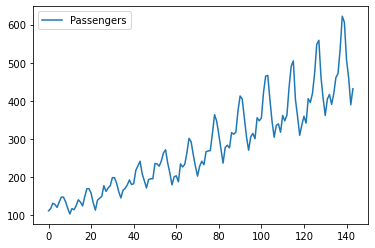

In [51]:
df2=pd.read_csv("/home/silvio/dataset/passengers/airline-passengers.csv")
print(df2)
df2.plot.line()

* A quantidade de passageiros cresce ao longo do tempo, porém há alguns padrões em meses específicos do ano

## Montando os passos temporais em duas colunas

* A coluna 0 representa o mês corrente e a segunda coluna o próximo mês
* Uma regressão pode ser usada para prever o próximo número de passageiros de um mês para outro

In [52]:
dataset = df2['Passengers']

col20=dataset[slice(1,dataset.shape[0])]
col10=dataset[slice(0,dataset.shape[0]-1)]

col1 = pd.Series([0])
col2 = pd.Series([dataset[0]])

col1=col1.append(col10)
col2=col2.append(col20)


df = pd.DataFrame({'t-1':col1.values,
                   't':col2.values})
df




,t-1,t
0,0,112
1,112,118
2,118,132
3,132,129
4,129,121
...,...,...
139,622,606
140,606,508
141,508,461
142,461,390


* O número de elementos na sequência pode ser alterado de forma a expressar corretamente o evento
* Nesse caso poderia ser usado 3 meses para detectar o quarto mês por exemplo

In [53]:
dataset = df2['Passengers']

col30=dataset[slice(2,dataset.shape[0])]
col20=dataset[slice(1,dataset.shape[0]-1)]
col10=dataset[slice(0,dataset.shape[0]-2)]

col1 = pd.Series([0])
col2 = pd.Series([dataset[0]])
col3 = pd.Series([dataset[1]])

col1=col1.append(col10)
col2=col2.append(col20)
col3=col3.append(col30)


df = pd.DataFrame({'t-2':col1.values,
                   't-1':col2.values,
                   't':col3.values})
df

,t-2,t-1,t
0,0,112,118
1,112,118,132
2,118,132,129
3,132,129,121
4,129,121,135
...,...,...,...
138,535,622,606
139,622,606,508
140,606,508,461
141,508,461,390


## Representação de audio

* Esse dataset (https://urbansounddataset.weebly.com/urbansound8k.html) contém 8732 amostras de audio das seguintes categorias: 

    * Air Conditioner
    * Car Horn
    * Children Playing
    * Dog bark
    * Drilling
    * Engine Idling
    * Gun Shot
    * Jackhammer
    * Siren
    * Street Music

* Um exemplo de áudio é fornecido em um formato digita (arquivo .wav) de alguns segundos, a partir dessa amostra o sistema deve classificar a amostra de acordo com uma das categorias mencionadas


* Amostras de som são arquivos de áudio digital no formato .wav. As ondas sonoras são digitalizadas em intervalos discretos (sampling rate)


* Cada amostra é a amplitude da onda em um intervalo de tempo específico, onde a profundidade do bit determina o quão detalhada a amostra também será conhecida como faixa dinâmica do sinal


* Dessa forma, um som é representado de forma simples, como um conjunto de valores ao longo de um intervalo de tempo fixo


* As amostras podem ter valores diversos para: 
    * Audio Channels
    * Sample rate
    * Bit-depth


* Nesse exemplo, foi usada a biblioteca librosa que fas o seguinte pre-processamento:

    * Converte a taxa de amostragem em 22,05 KHz
    * Normaliza os dados para que os valores de profundidade de bits variem entre -1 e 1 
    * Nivelam os canais de áudio em mono 

In [24]:
!ls /home/silvio/dataset/sound/UrbanSound8K/

audio  FREESOUNDCREDITS.txt  metadata  UrbanSound8K_README.txt


In [34]:
import struct 

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [36]:
wavfilehelper = WavFileHelper()

metadata = pd.read_csv('/home/silvio/dataset/sound/UrbanSound8K/metadata/UrbanSound8K.csv')

audiodata = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('/home/silvio/dataset/sound/UrbanSound8K//audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    #print(file_name)
    data = wavfilehelper.read_file_properties(file_name)
    #data = WaveReader(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [37]:
audiodf

,num_channels,sample_rate,bit_depth
0,2,44100,16
1,2,44100,16
2,2,44100,16
3,2,44100,16
4,2,44100,16
...,...,...,...
8727,2,44100,16
8728,2,44100,16
8729,2,44100,16
8730,2,44100,16


In [ ]:
audiodf.describe()

In [ ]:
!cat ../datasets/sound/UrbanSound8K/metadata/UrbanSound8K.csv

In [ ]:
!ls ../datasets/sound/UrbanSound8K/audio/

In [ ]:
metadata2 = pd.read_csv( '/home/silvio/dataset/sound/UrbanSound8K//metadata/UrbanSound8K.csv')
metadata

In [ ]:
metadata[:100]

## Extraindo as features

In [38]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        #print(mfccs)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

# Set the path to the full UrbanSound dataset 
fulldatasetpath = '/home/silvio/dataset/sound/UrbanSound8K//audio'

metadata2 = pd.read_csv( '/home/silvio/dataset/sound/UrbanSound8K//metadata/UrbanSound8K.csv')
metadata = metadata2[:5]
features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

Finished feature extraction from  5  files


In [39]:
featuresdf

,feature,class_label
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.80034, -47.92471, 53.265694, ...",children_playing
3,"[-414.55377, 102.896904, -36.664955, 54.18041,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


# Converte sinais de audio e categorias para X e y

In [41]:
from tensorflow.keras.utils import to_categorical 

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(x_train)
print(y_train)

(4, 40)
(4, 2)
(1, 40)
(1, 2)
[[-4.47397003e+02  1.15095398e+02 -5.38091125e+01  6.16085854e+01
   1.64259756e+00  2.61128635e+01  1.99506688e+00  1.07390728e+01
   2.59629965e+00  1.06359844e+01 -1.47325716e+01  1.72388000e+01
  -4.05125856e+00  1.02570000e+01  1.64704692e+00  9.68666458e+00
  -5.94668722e+00  5.19548321e+00 -7.32175493e+00  1.15191383e+01
   3.38942170e-01  5.63253498e+00 -1.51091981e+00  4.01716900e+00
  -2.92805648e+00  1.96119189e+00 -1.60960925e+00  4.49101496e+00
  -7.18865395e-01 -3.39034051e-01 -2.40165138e+00 -1.48841321e+00
  -2.28908643e-01  1.70549798e+00 -2.04143786e+00  6.17622845e-02
  -7.78468549e-01  2.19259501e+00  1.00515425e+00  1.91029057e-01]
 [-4.59564667e+02  1.22800339e+02 -4.79247093e+01  5.32656937e+01
  -1.13986838e+00  2.47723713e+01  7.98013639e+00  9.67425823e+00
  -1.02354395e+00  1.12044497e+01 -1.18449421e+01  1.43469524e+01
  -3.51148438e+00  1.14010563e+01 -3.67504448e-01  6.43268776e+00
  -6.60325956e+00  3.28451920e+00 -2.08006835

Representação de texto

* Um texto pode ser representado como cada parágrafo sendo uma linha no dataset e cada palavras uma coluna

* Palavras podem ser vetorizadas para possuirem uma representação numérica

* Uma estratégia é associar um número para cada palavra que pode aparecer no texto, e trocar todas as palavras do texto pelo número correspondente

    * Análise de sentimento
    * https://github.com/vineetdhanawat/twitter-sentiment-analysis

In [59]:
url="/home/silvio/dataset/sentiment/analise-de-sentimento.csv"
df2=pd.read_csv(url,encoding='latin-1')
df2

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
1048570,1048584,0,Missing my fiancee sooo badly!!! I love you b...
1048571,1048585,0,missing my friend
1048572,1048586,0,Missing my friend and my cousin. Two months pa...
1048573,1048587,0,missing my friends!


In [60]:
df2['Sentiment'].unique()

array([0, 1])

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(df2['SentimentText'].head(10))

print(vectorizer.vocabulary_)
print(vectorizer.idf_)

t=df2['SentimentText'].head(1)
print('t ', t.values)

vector = vectorizer.transform([t[0]])

print(vector.shape)
print(vector.toarray())

{'is': 23, 'so': 44, 'sad': 41, 'for': 14, 'my': 33, 'apl': 5, 'friend': 15, 'missed': 30, 'the': 49, 'new': 34, 'moon': 31, 'trailer': 56, 'omg': 36, 'its': 24, 'already': 4, '30': 1, 'omgaga': 37, 'im': 21, 'sooo': 45, 'gunna': 17, 'cry': 12, 've': 59, 'been': 7, 'at': 6, 'this': 51, 'dentist': 13, 'since': 43, '11': 0, 'was': 60, 'suposed': 47, 'just': 25, 'get': 16, 'crown': 11, 'put': 40, 'on': 38, '30mins': 2, 'think': 50, 'mi': 28, 'bf': 8, 'cheating': 9, 'me': 27, 't_t': 48, 'or': 39, 'worry': 63, 'too': 55, 'much': 32, 'juuuuuuuuuuuuuuuuussssst': 26, 'chillin': 10, 'sunny': 46, 'again': 3, 'work': 62, 'tomorrow': 53, 'tv': 57, 'tonight': 54, 'handed': 18, 'in': 22, 'uniform': 58, 'today': 52, 'miss': 29, 'you': 64, 'hmmmm': 19, 'wonder': 61, 'how': 20, 'she': 42, 'number': 35}
[2.70474809 2.70474809 2.70474809 2.70474809 2.29928298 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2